# Análisis general

<p>Análisis exploratorio de los datos ingestados en la BD de Redshift. Los datos están en la base de datos en Redshift, y las consultas fueron originalmente ejecutadas en un notebook de Redshift.<p>
<p>**Nota:** Los resultados de las consultas utilizadas en las gráficas fueron redondeados a enteros porque en algunos casos, el editor no interpretaba correctamente los valores decimales al graficar.

## Vista previa de los datos

In [ ]:
SELECT * FROM viaje_taxi LIMIT 5;

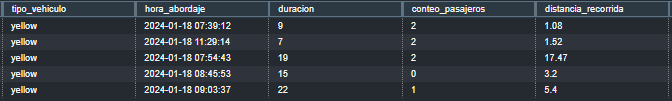
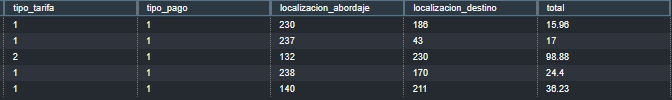
<p>Los datos tienen las siguientes columnas:<p>
- tipo_vehiculo: Amarillo o verde.<br>
- hora_abordaje: Fecha y hora de abordaje del viaje.<br>
- duracion: Duración del viaje en minutos.<br>
- conteo_pasajeros: Número de pasajeros del viaje.<br>
- distancia_recorrida: Distancia recorrida en millas.<br>
- tipo_tarifa: Tarifa de cobro utilizada.<br>
- tipo_pago: Medio de pago utilizado.<br>
- localizacion_abordaje: Localización de abordaje de los pasajeros.<br>
- localizacion_destino: Localización de destino del viaje.<br>
- total: Costo total del viaje en dólares.<br>

## Conteo de los viajes por tipo de vehículo

In [ ]:
SELECT tipo_vehiculo, COUNT(*) AS conteo FROM viaje_taxi GROUP BY tipo_vehiculo;

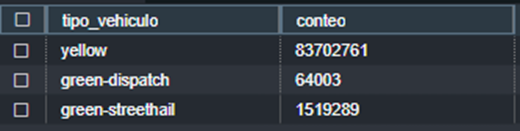
<p>Como puede verse en la imagen, la gran mayoría de viajes corresponde a taxis amarillos, con cerca de 1.5 millones de registros de taxis verdes.

## Conteo por cantidad de pasajeros

In [ ]:
SELECT conteo_pasajeros, COUNT(*) AS Total
FROM viaje_taxi
GROUP BY conteo_pasajeros;

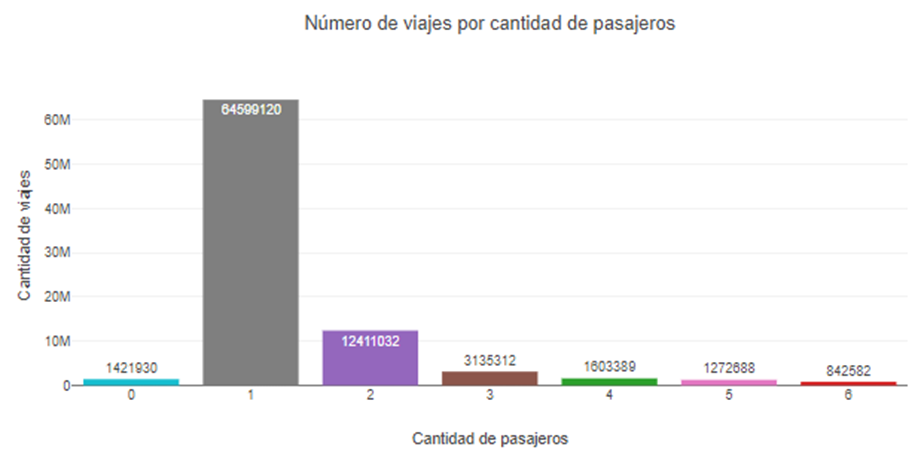
<p>La mayoría de viajes en taxis solo tuvieron un pasajero. Además, considerando que la capacidad de un vehículo utilizado para transporte normalmente es de 5 personas incluyendo el conductor, sorprende que haya registros con 5 o 6 pasajeros (cerca de 2 millones).

## Conteo por tipo de pago y tipo de tarifa

In [ ]:
SELECT tp.pago AS Pago, COUNT(vt.conteo_pasajeros) AS Total
FROM viaje_taxi vt
JOIN tipo_pago tp ON(vt.tipo_pago = tp.codigo)
GROUP BY tp.pago;

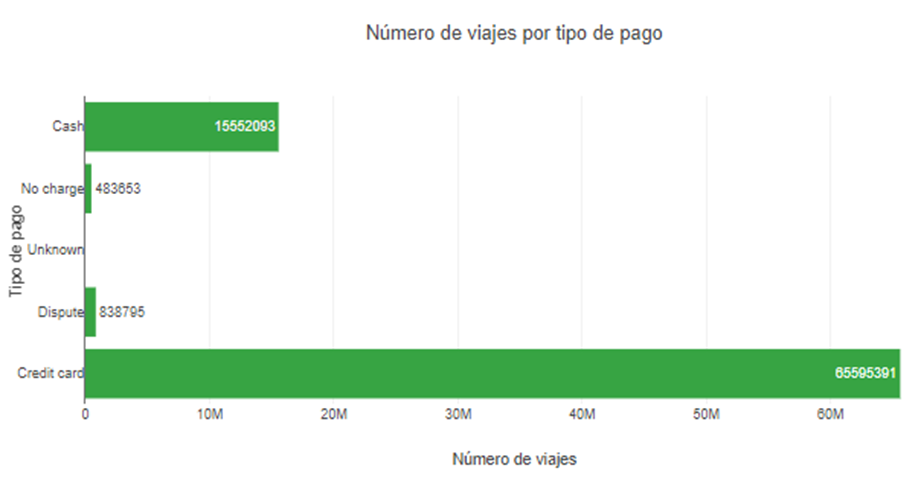

In [ ]:
SELECT tf.tarifa AS Tarifa, COUNT(vt.*) AS Total
FROM viaje_taxi vt
JOIN tipo_tarifa tf ON(vt.tipo_tarifa = tf.codigo)
GROUP BY tf.tarifa;

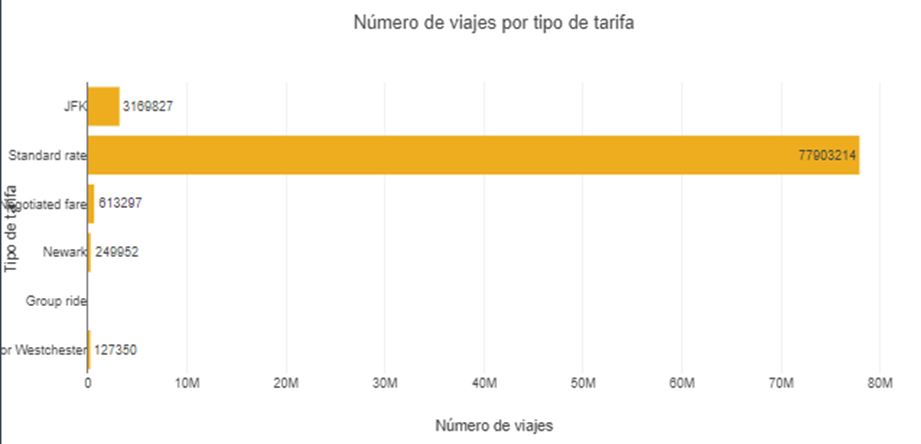
<p>La gran mayoría de viajes utilizaron Tarjeta de crédito o Efectivo como medio de pago, y se calculó el precio con la tarifa Estándar. Otros tipos de tarifa parecen usarse solo para casos especiales.

## Histórico de la cantidad de viajes

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM-DD') as Fecha, COUNT(*)
FROM viaje_taxi GROUP BY Fecha ORDER BY Fecha;

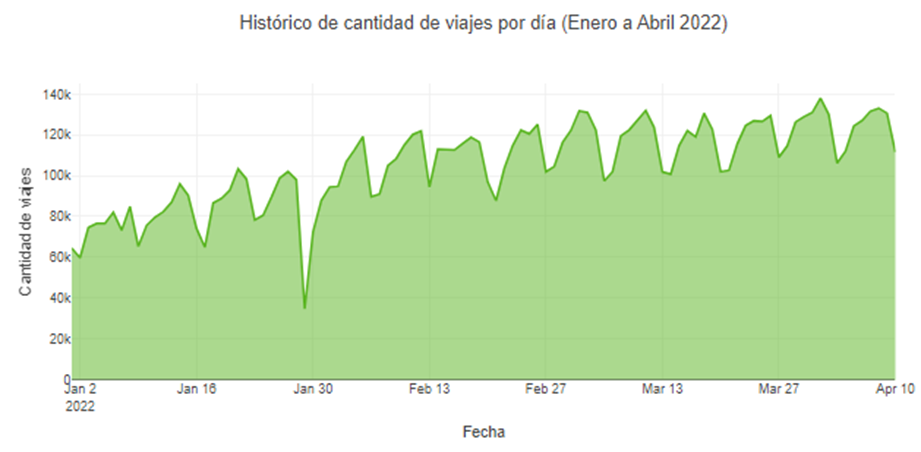
<p>Como puede verse, la gráfica por día parece seguir un patrón de picos y valles que (en su mayoría) puede relacionarse con los días de la semana. Con una búsqueda web, podría teorizarse que los fines de semana hay menos viajes que los días de semana que corresponden a días laborales.

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, COUNT(*)
FROM viaje_taxi GROUP BY Fecha ORDER BY Fecha;

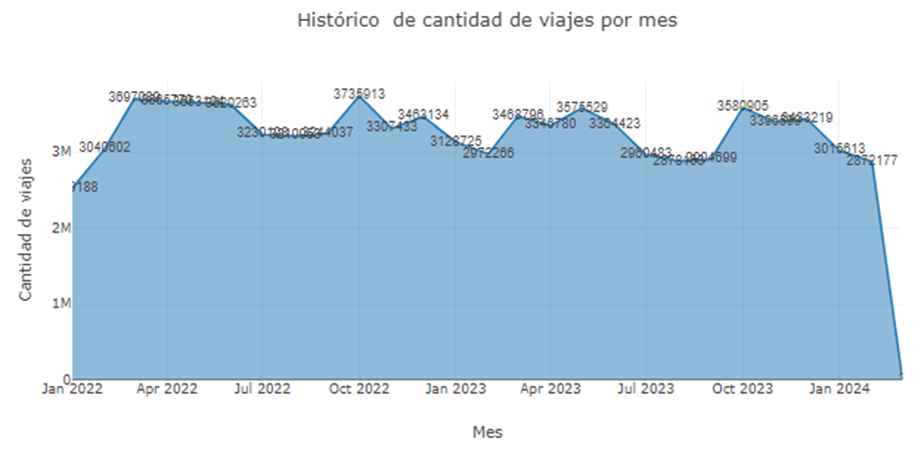
<p>Respecto a la cantidad por mes, parecen abundar más los viajes entre los meses de Marzo a Mayo (que suele ser el comienzo o la parte inicial del año laboral y escolar) y de Octubre a Diciembre (meses que corresponden al "fin de año").

### Según barrio de abordaje

In [ ]:
SELECT zt.barrio as Barrio, COUNT(vt.*)
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_abordaje = zt.idzona)
GROUP BY Barrio;

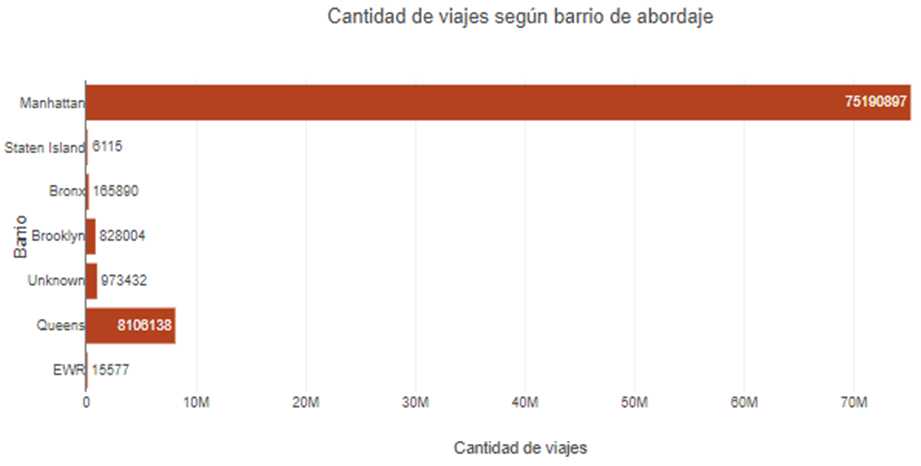
<p>La mayoría de viajes se abordaron en Manhattan, que es considerado el centro financiero y cultural de NY.

### Según barrio de destino

In [ ]:
SELECT zt.barrio as Barrio, COUNT(vt.*)
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_destino = zt.idzona)
GROUP BY Barrio;

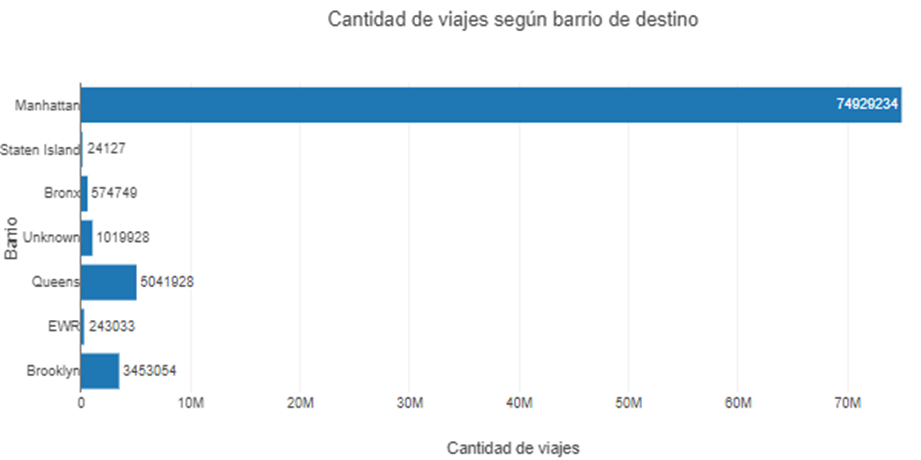
<p>Igualmente, la mayoría de localizaciones de destino están en Manhattan.

# Análisis de viajes en taxis amarillos

## Conteo de pasajeros

In [ ]:
SELECT conteo_pasajeros, COUNT(*) AS Total
FROM viaje_taxi
WHERE tipo_vehiculo = 'yellow'
GROUP BY conteo_pasajeros;

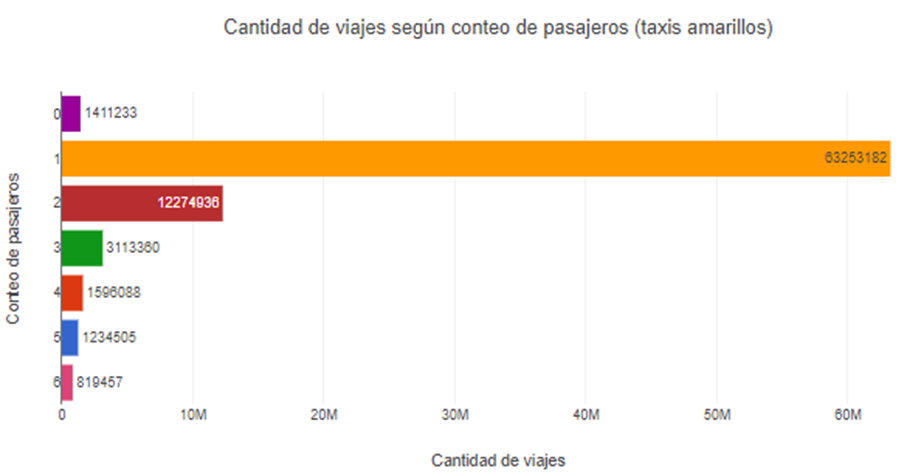

## Histórico de la cantidad de viajes, el promedio del costo, el promedio de distancia recorrida y el promedio de la duración de los viajes

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, COUNT(*)
FROM viaje_taxi WHERE tipo_vehiculo = 'yellow'
GROUP BY Fecha ORDER BY Fecha;

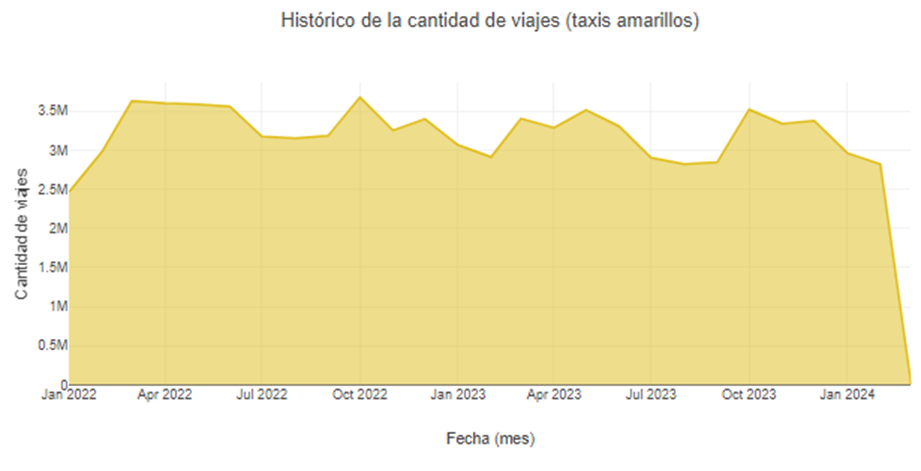
<p>Las cantidades de viajes amarillos parecen seguir el mismo patrón de variación que los viajes totales (téngase en cuenta que al ser la clase mayoritaria, influye fuertemente en el total).

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, ROUND(AVG(total))
FROM viaje_taxi WHERE tipo_vehiculo = 'yellow'
GROUP BY Fecha ORDER BY Fecha;

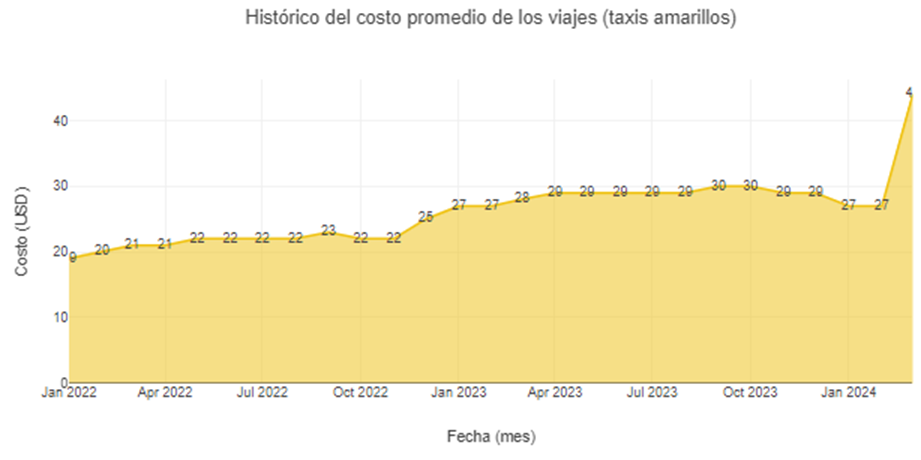
<p>La variación del precio promedio de los viajes tiende a aumentar de una forma constante, probablemente respondiendo a factores como la inflación.

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, ROUND(AVG(distancia_recorrida))
FROM viaje_taxi WHERE tipo_vehiculo = 'yellow'
GROUP BY Fecha ORDER BY Fecha;

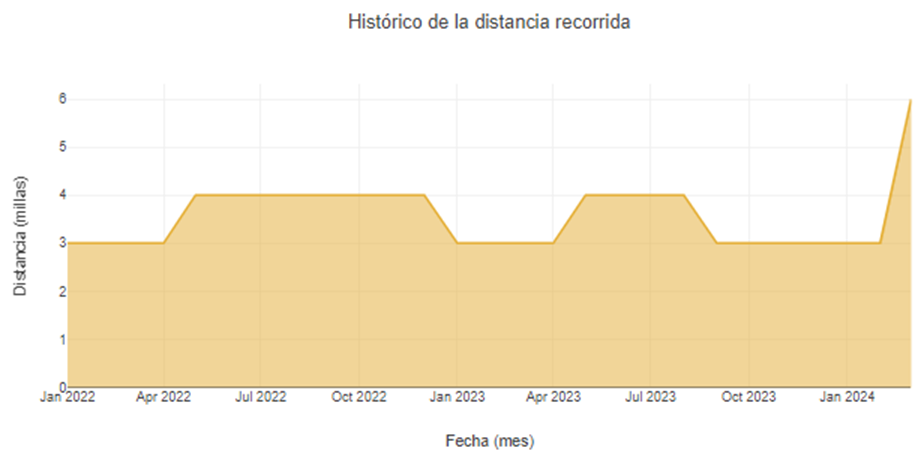
<p>El promedio de las millas recorridas de los viajes al mes está entre las tres y cuatro millas de distancia. Esto puede explicarse dado que la mayoría de localizaciones tanto de abordaje como de destino están en Manhattab.

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, ROUND(AVG(duracion))
FROM viaje_taxi WHERE tipo_vehiculo = 'yellow'
GROUP BY Fecha ORDER BY Fecha;

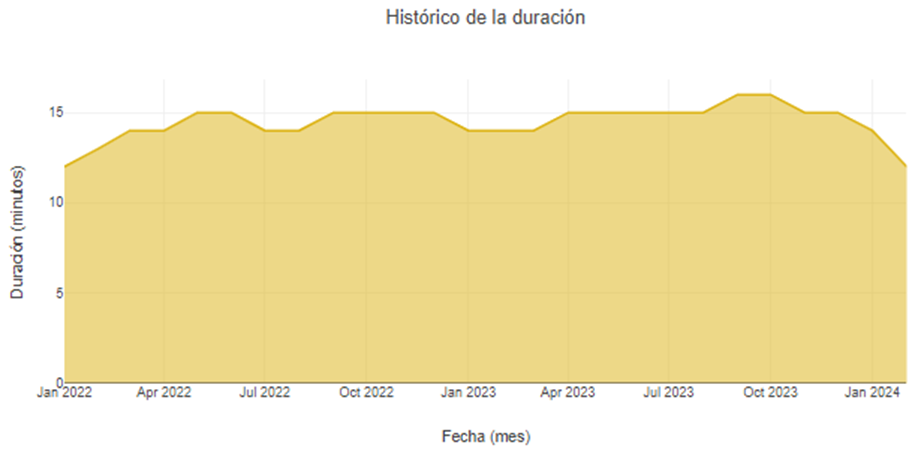
<p>Por las mismas razones, es esperable que el promedio de la duración de los viajes está entre los 10 y 15 minutos.

## Comparación del costo vs la cantidad de pasajeros

In [ ]:
SELECT conteo_pasajeros, ROUND(AVG(total))
FROM viaje_taxi WHERE tipo_vehiculo = 'yellow'
GROUP BY conteo_pasajeros ORDER BY conteo_pasajeros;

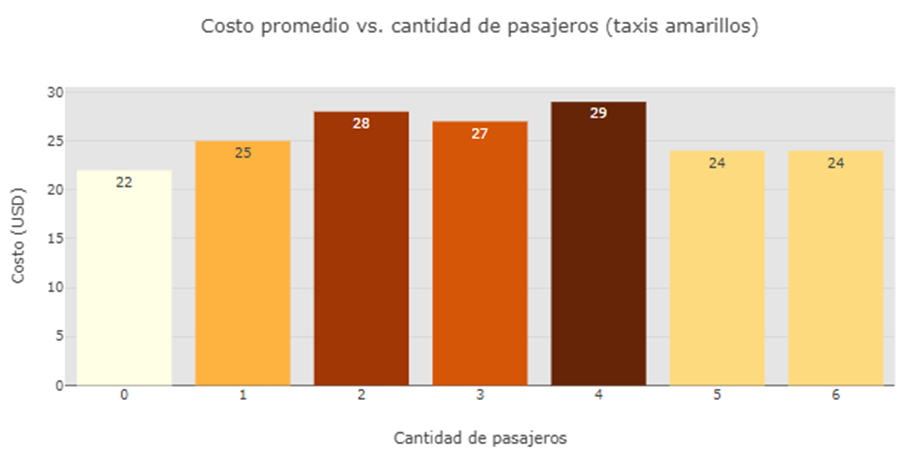
<p>Hasta los cuatro pasajeros, la tendencia del costo promedio es aumentar, pero en registros con 5 o 6 pasajeros disminuye nuevamente. Si bien es posible que se trate de registros erróneos, considerando aspectos como que Manhattan es el barrio de la mayoría de localizaciones de partida y destino de los viajes, y los valores del costo, duración y distancia promedio, puede decirse que estos registros corresponden en su mayoría a viajes cortos dentro de Manhattan.

## Comparación de la cantidad de viajes y el costo vs. la localización de abordaje y de destino

### Localización de abordaje

In [ ]:
SELECT zt.barrio as Barrio, COUNT(*)
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_abordaje = zt.idzona)
WHERE tipo_vehiculo = 'yellow' GROUP BY Barrio;

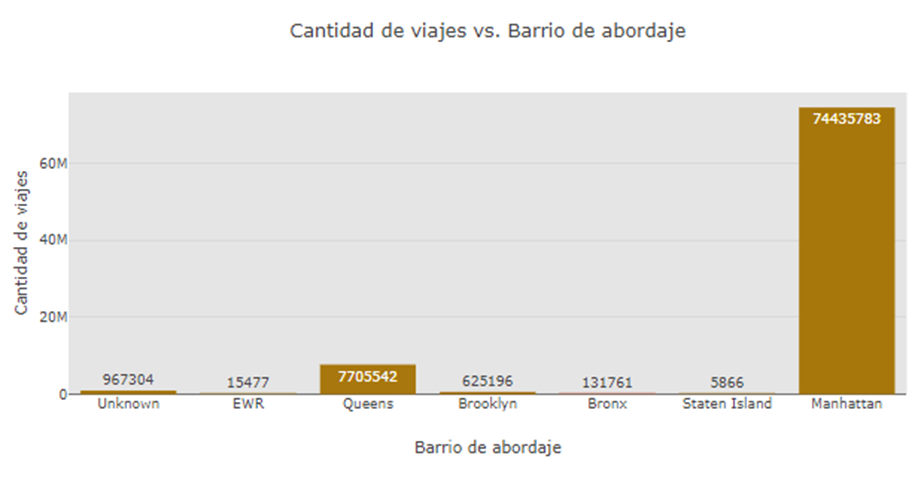

In [ ]:
SELECT zt.barrio as Barrio, ROUND(AVG(vt.total))
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_abordaje = zt.idzona)
WHERE tipo_vehiculo = 'yellow' GROUP BY Barrio;

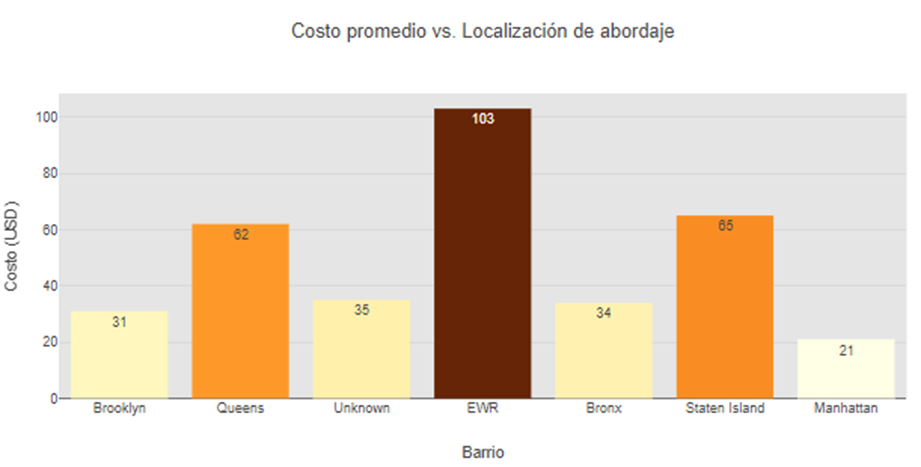
<p>Nótese que el costo promedio de viajes en Manhattan es el de menor valor que los demás. Además, el de mayor valor es el de los viajes que parten del aeropuerto EWR (Newark Liberty International Airport), seguido por aquellos que parten de Staten Island y Queens, el distrito más alejado de Manhattan y el de mayor extensión territorial respectivamente.

### Localización de destino

In [ ]:
SELECT zt.barrio as Barrio, COUNT(*)
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_destino = zt.idzona)
WHERE tipo_vehiculo = 'yellow' GROUP BY Barrio;

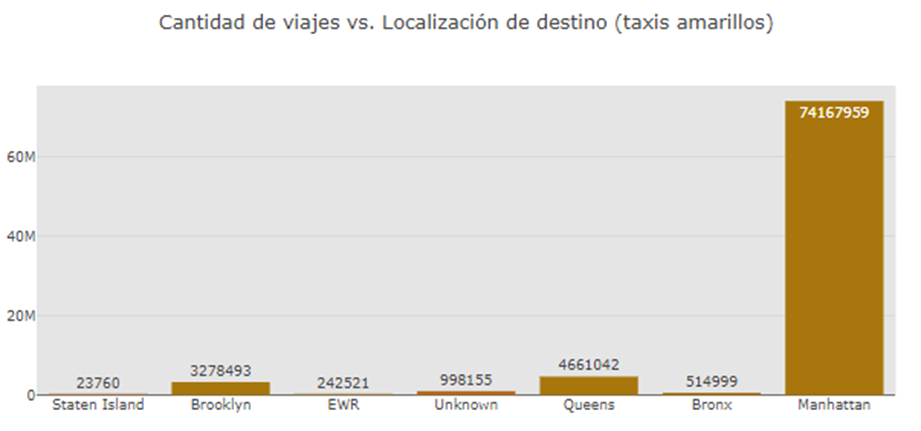

In [ ]:
SELECT zt.barrio as Barrio, ROUND(AVG(vt.total))
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_destino = zt.idzona)
WHERE tipo_vehiculo = 'yellow' GROUP BY Barrio;

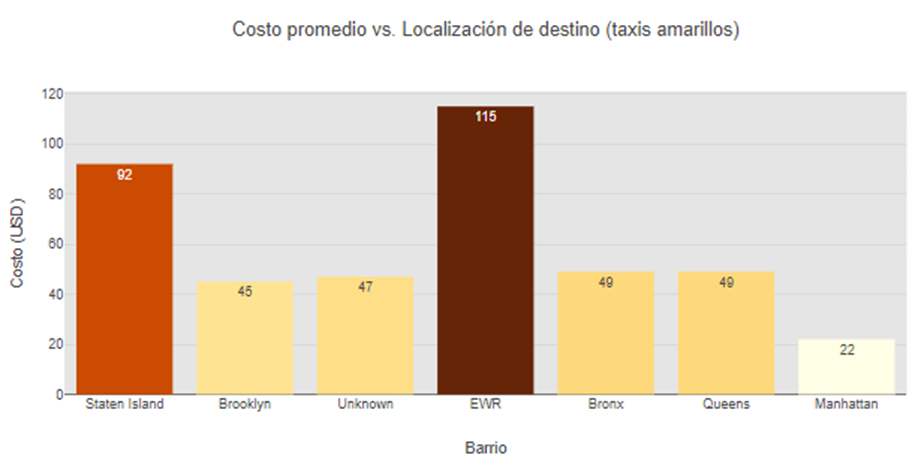
<p>De forma similar, el menor promedio es el de los viajes con destino en Manhattan, y los de mayor aquellos con destino en el aeropuerto EWR y en Staten Island.

# Análisis de viajes en taxis verdes

## Conteo de pasajeros

In [ ]:
SELECT conteo_pasajeros, COUNT(*) AS Total
FROM viaje_taxi
WHERE tipo_vehiculo <> 'yellow'
GROUP BY conteo_pasajeros;

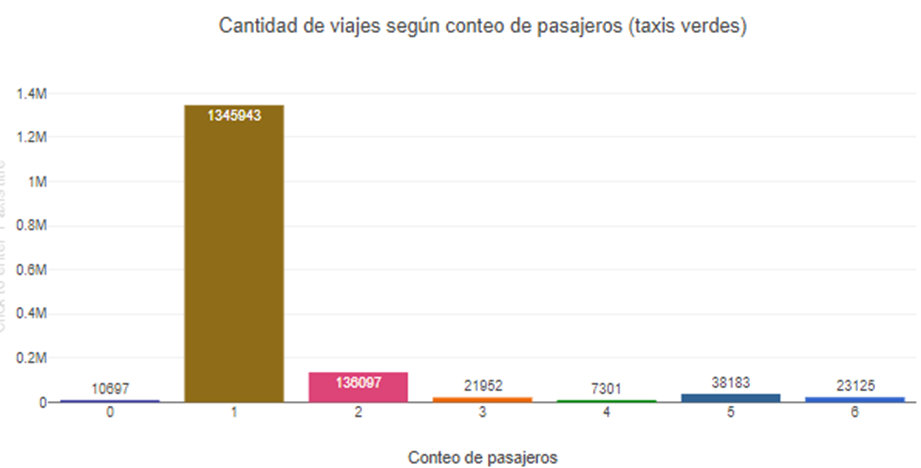

## Histórico de la cantidad de viajes, el promedio del costo, el promedio de distancia recorrida y el promedio de la duración de los viajes

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, COUNT(*)
FROM viaje_taxi WHERE tipo_vehiculo <> 'yellow'
GROUP BY Fecha ORDER BY Fecha;

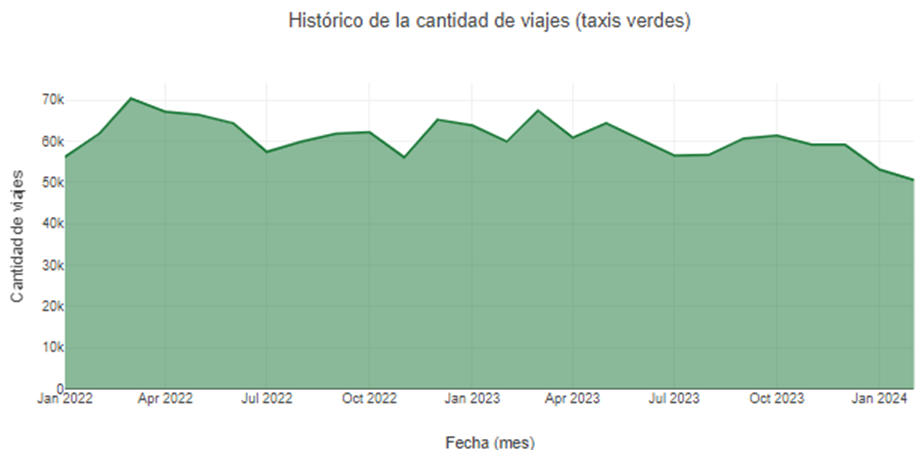
<p>La cantidad de viajes en taxis verdes parece seguir, aunque no tan fuertemente, el patrón de viajes general. Por otra parte, aparenta ir disminuyendo con el tiempo, aunque se requieren más datos para confirmar o rebatir esta hipótesis.

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, ROUND(AVG(total))
FROM viaje_taxi WHERE tipo_vehiculo <> 'yellow'
GROUP BY Fecha ORDER BY Fecha;

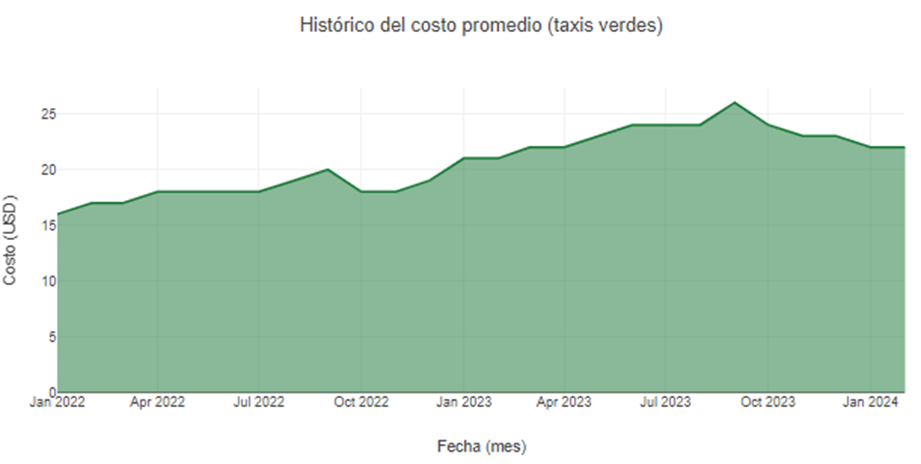
<p>El costo promedio de los taxis verdes parece tener la misma tendencia y el mismo rango de valores que los taxis amarillos.

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, ROUND(AVG(distancia_recorrida))
FROM viaje_taxi WHERE tipo_vehiculo <> 'yellow'
GROUP BY Fecha ORDER BY Fecha;

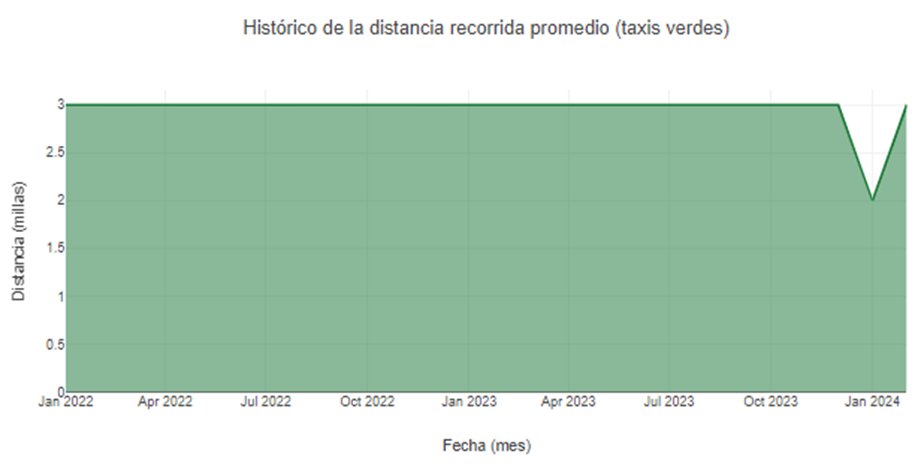

In [ ]:
SELECT to_date(hora_abordaje, 'YYYY-MM') as Fecha, ROUND(AVG(duracion))
FROM viaje_taxi WHERE tipo_vehiculo <> 'yellow'
GROUP BY Fecha ORDER BY Fecha;

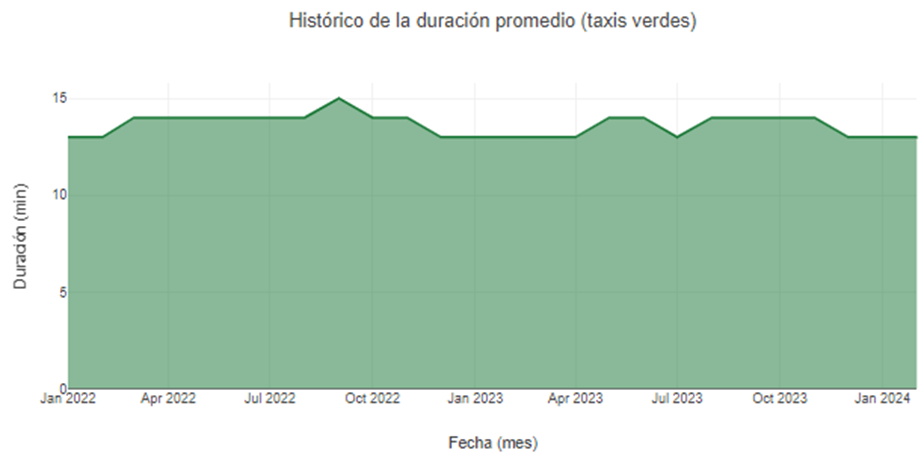

## Comparación del costo vs la cantidad de pasajeros

In [ ]:
SELECT conteo_pasajeros, ROUND(AVG(total))
FROM viaje_taxi WHERE tipo_vehiculo <> 'yellow'
GROUP BY conteo_pasajeros ORDER BY conteo_pasajeros;

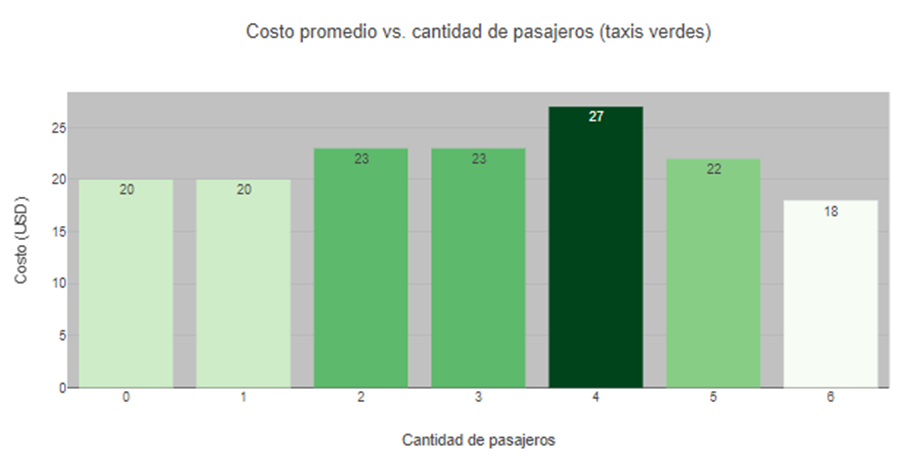

## Comparación de la cantidad y el costo vs. la localización de abordaje y de destino

### Localización de abordaje

In [ ]:
SELECT zt.barrio as Barrio, COUNT(*)
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_abordaje = zt.idzona)
WHERE tipo_vehiculo <> 'yellow' GROUP BY Barrio;

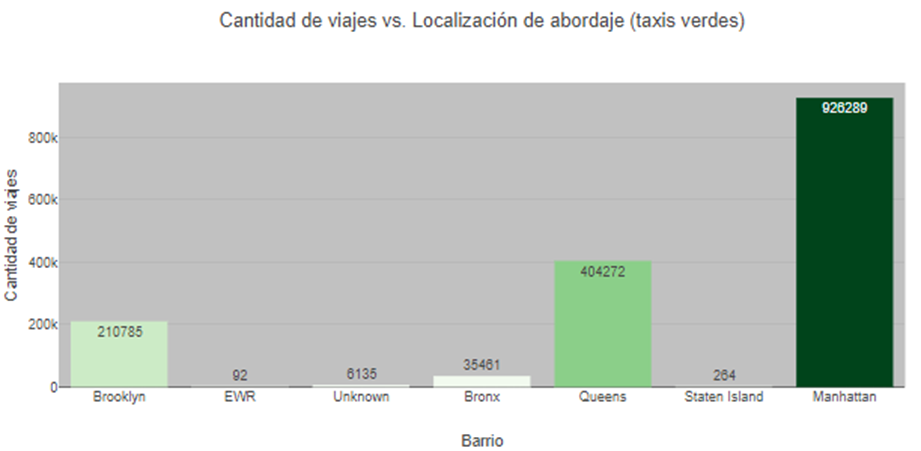
<p>En este caso, si bien Manhattan sigue siendo el barrio predominante entre las localizaciones de abordaje, le siguen Queens y Brooklyn, más cercanos a Manhattan que Staten Island.

In [ ]:
SELECT zt.barrio as Barrio, ROUND(AVG(vt.total))
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_abordaje = zt.idzona)
WHERE tipo_vehiculo <> 'yellow' GROUP BY Barrio;

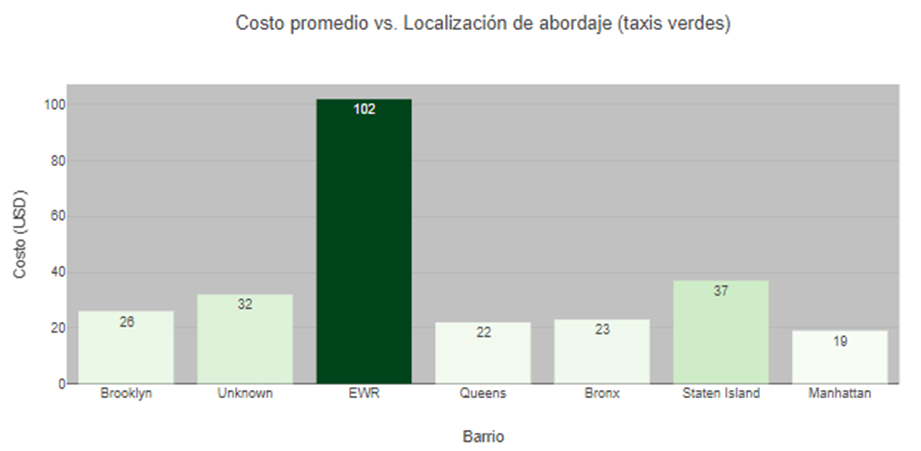

#### Localización de destino

In [ ]:
SELECT zt.barrio as Barrio, COUNT(*)
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_destino = zt.idzona)
WHERE tipo_vehiculo <> 'yellow' GROUP BY Barrio;

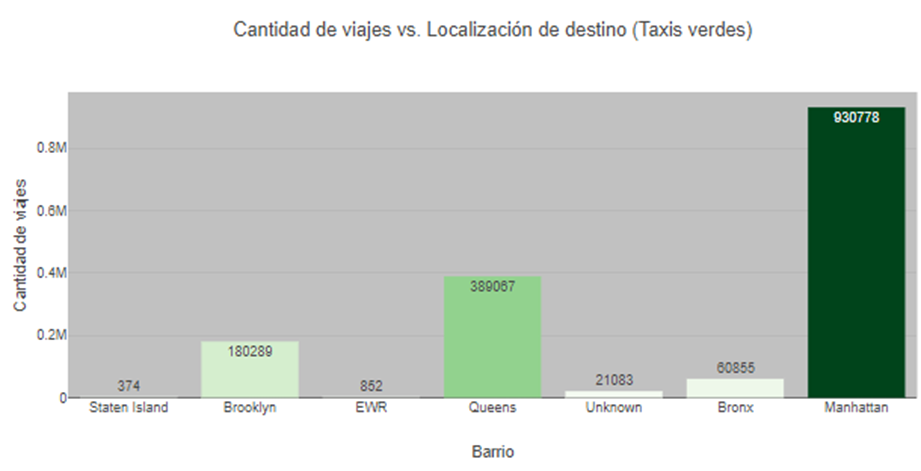
<p>Entre las localizaciones de destino, se repite el patrón con las de origen.

In [ ]:
SELECT zt.barrio as Barrio, ROUND(AVG(vt.total))
FROM viaje_taxi vt
JOIN zona_taxi zt ON(vt.localizacion_destino = zt.idzona)
WHERE tipo_vehiculo <> 'yellow' GROUP BY Barrio;

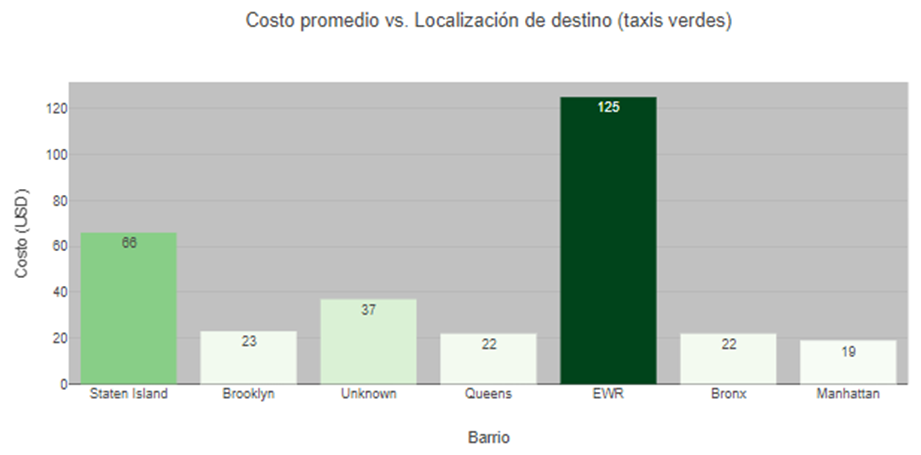

# Conclusión
<p> En general, los taxis verdes parecen seguir los patrones de costo, duración y distancia recorrida de los taxis amarillos, sin ninguna diferencia. Posiblemente deba trabajarse tanto en incluir más unidades de este tipo, como en la socialización sobre sus beneficios generales.